# Домашнє завдання до модуля 4: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте бібліотеки matplotlib.pyplot, seaborn та pandas.

In [102]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [103]:
%matplotlib inline

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [104]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [105]:
display(df_taxi[:3])

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [106]:
display(df_taxi.dtypes)

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [107]:
display(df_taxi.shape)

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

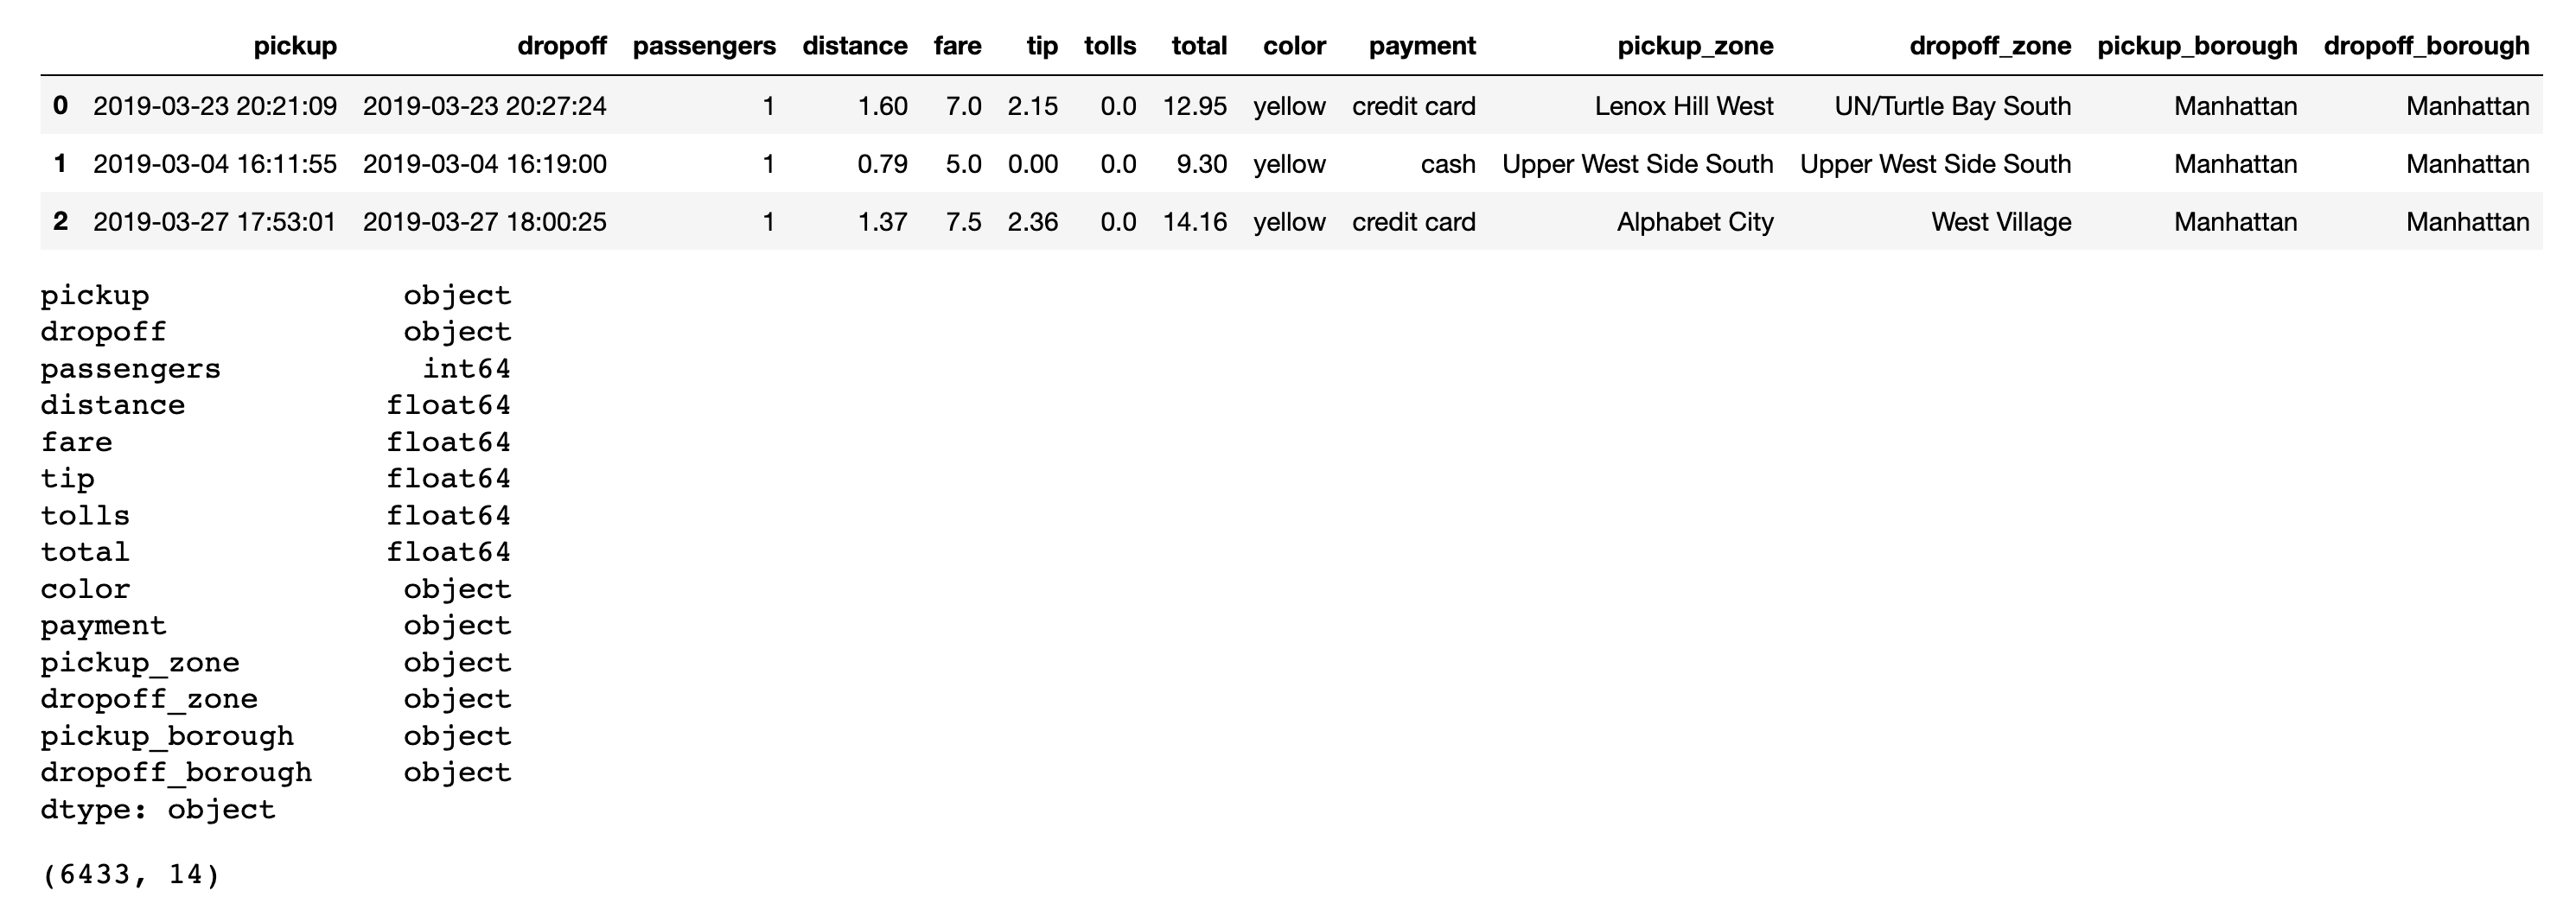

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [108]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [109]:
df_taxi.payment.unique()

array(['credit card', 'cash', nan], dtype=object)

In [110]:
print(len(df_taxi[df_taxi.payment.isna()][df_taxi.distance == 0]))
print(len(df_taxi[df_taxi.payment.isna()][df_taxi.distance != 0]))
display(len(df_taxi[df_taxi.distance == 0][df_taxi.total != 0]))

5
39


C:\Users\v_verbitskaya\AppData\Local\Temp\ipykernel_9720\3422882067.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df_taxi[df_taxi.payment.isna()][df_taxi.distance == 0]))
C:\Users\v_verbitskaya\AppData\Local\Temp\ipykernel_9720\3422882067.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df_taxi[df_taxi.payment.isna()][df_taxi.distance != 0]))
C:\Users\v_verbitskaya\AppData\Local\Temp\ipykernel_9720\3422882067.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(len(df_taxi[df_taxi.distance == 0][df_taxi.total != 0]))


51

In [111]:
display(
    len(
        df_taxi[df_taxi.distance == 0][df_taxi.total != df_taxi.fare][df_taxi.pickup_zone == df_taxi.dropoff_zone]
        [df_taxi.pickup_borough == df_taxi.dropoff_borough]
    )
)

C:\Users\v_verbitskaya\AppData\Local\Temp\ipykernel_9720\3460676799.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_taxi[df_taxi.distance == 0][df_taxi.total != df_taxi.fare][df_taxi.pickup_zone == df_taxi.dropoff_zone]
C:\Users\v_verbitskaya\AppData\Local\Temp\ipykernel_9720\3460676799.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_taxi[df_taxi.distance == 0][df_taxi.total != df_taxi.fare][df_taxi.pickup_zone == df_taxi.dropoff_zone]
C:\Users\v_verbitskaya\AppData\Local\Temp\ipykernel_9720\3460676799.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_taxi[df_taxi.distance == 0][df_taxi.total != df_taxi.fare][df_taxi.pickup_zone == df_taxi.dropoff_zone]


29

In [112]:
display(
    len(
        df_taxi[df_taxi.distance == 0][df_taxi.total == df_taxi.fare + df_taxi.tip + df_taxi.tolls]
    )
)

C:\Users\v_verbitskaya\AppData\Local\Temp\ipykernel_9720\1871353473.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_taxi[df_taxi.distance == 0][df_taxi.total == df_taxi.fare + df_taxi.tip + df_taxi.tolls]


7

In [113]:
display(
    len(
        df_taxi[df_taxi.total < df_taxi.fare]
    )
)

0

In [114]:
display(
    len(
        df_taxi[df_taxi.distance == 0]
    )
)

51

In [115]:
display(
    len(
        df_taxi[df_taxi.passengers == 0][df_taxi.payment.isna()][df_taxi.distance == 0]
    )
)

C:\Users\v_verbitskaya\AppData\Local\Temp\ipykernel_9720\3208399731.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_taxi[df_taxi.passengers == 0][df_taxi.payment.isna()][df_taxi.distance == 0]
C:\Users\v_verbitskaya\AppData\Local\Temp\ipykernel_9720\3208399731.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_taxi[df_taxi.passengers == 0][df_taxi.payment.isna()][df_taxi.distance == 0]


0

Я вважаю, що дані треба аналізувати з двох боків:
1. Пропущені дані;
2. Підозрілі аба не коректні дані. Наприклад, нулі та відємні данні в тих полях, де вони такими бути не можуть.

Проаналізуємо пропущені дані. До уваги будемо брати ті поля, які не заповнені. Аналіз (df_taxi.isna().sum()) показує, що незапвлені дані є лише у текстових полях. Певні закономірності і важливі, на мою думку, факти:

1. Дуже багато не заповленних даних у полі payment.Це поле може приймати три унікальні значення: credit card/cash/nan. Які можуть бути причини наявності Nan у цьому полі:
   1.1 Поїздка фактично не відбулася, тобто таксі вилкикали через App,водій приїхав на виклик, але пасажир не прийшов. Логічно припустити, що в такому випадку distance == 0. Таких записів у нас всього лише 5
   1.2.Інші 39 випадкыв складають поїздки, які відбувалися, але інформаціі про сплату у базі немає. Можемо припустити, що інформація відсутня, бо сплата фактично не пройшла по факту завершення поїздки, тобто була відмова у транзакції. Але щоб підвердити або спростувати таке припущення, треба володіти інформацією, чи відбувається блокування мінімальної суми поіздки перед початком заказу.
   1.3. Дані могли просто бути не передані в базу накопичення інформації (збої у роботі ПО, наприклад) або не занесені водіями у систему (тобто атоматичні показники були зафіксовані (район/зона початку/закінчення поїздки), а дані, які треба вносити вручну водієві, занесені не були (в анотаціі до даних вказано, що люди можуть ловити таксі на вулиці

2. Аналіз підозрілих даних.
      2.1. Поля в яких distance==0, а total!=0. Загальна калькість таких полів 51. Моделюємо ситуації, в яких таке можливе та первіряємо їх
      Ситуація 1. Виклик таксі був оформлений завчасно, водій приїхав, але посажири не прийшли/відмінили замовлення. В такому випадку total == fare, а pickup_zone == dropoff_zone та pickup_borough == dropoff_borough. Таких поїздок всього 2.
      Ситуація 2. Замовлення було виконане, але дані були записані не коректно. Наприклад, не працював таксометр, тому distance == 0, але тоді логічно припустити, справедливим має бути і наступне: total = fare + tip + tolls. Таких записів лише 7. А записи, для яких це не виконується, є хибними.
      Таким чином, на мою думку, потрібно залишити 2 (Ситуація 1.) +7 (Ситуація 2) записів, а останні записи з distance==0 видалити, бо вони є хибними.
      2.2 Проаналізуємо чи є записи, для яких total < fare. Таких даних немає. Тут все ОК.
      2.3 Проаналізуємо записи у яких кількість пасажирів 0. Взагалі така ситуація можлива, якщо служби таксі допускають використанні замавлень таксі під доставку (Нам про це нічого не відомо). Нас більше буде цікавити, які ще є не типові значення у таких записів. Загальна кількість таких записів 96. Серед них:
     0 замовлень,  для яких passengers == 0, payment == Nan, distance == 0

In [116]:
display(df_taxi[df_taxi.payment.isna()])

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.0,0.00,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.0,0.00,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.0,0.00,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.0,0.00,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
621,2019-03-15 17:16:35,2019-03-15 17:25:01,1,1.3,7.5,0.0,0.00,11.80,yellow,NaN,Upper East Side North,Upper East Side South,Manhattan,Manhattan
770,2019-03-02 03:16:59,2019-03-02 03:17:06,0,9.4,2.5,0.0,0.00,3.80,yellow,NaN,JFK Airport,JFK Airport,Queens,Queens
913,2019-03-23 11:26:58,2019-03-23 11:35:17,2,1.3,7.5,0.0,0.00,10.80,yellow,NaN,Upper East Side South,Lincoln Square West,Manhattan,Manhattan
953,2019-03-08 02:58:37,2019-03-08 03:19:27,2,6.9,23.5,0.0,0.00,27.30,yellow,NaN,Garment District,Central Harlem North,Manhattan,Manhattan
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.0,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1372,2019-03-12 09:19:44,2019-03-12 09:43:09,1,1.6,14.5,0.0,0.00,17.80,yellow,NaN,Midtown East,Garment District,Manhattan,Manhattan


3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [117]:
df_taxi_clean = df_taxi.fillna('NA')

Після виконання завдання запустіть наступну клітинку:

In [118]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

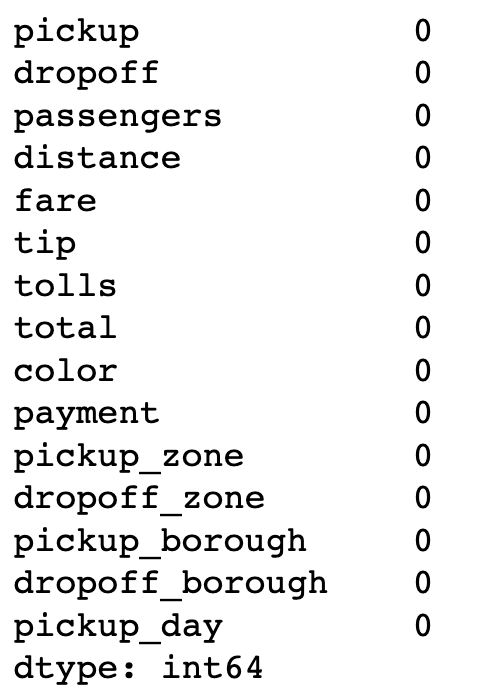

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. 
Якщо у Вас при завантаженні набору даних колонка `pickup`- вже в форматі `datetime64[ns]` - можете пропустити це завдання, або спробувати все ж таки написат функцію для трансформації.

Результат перетворення збережіть в тій самій колонці `pickup`.

In [119]:
df_taxi_clean.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

Після виконання завдання запустіть наступну клітинку:

In [120]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

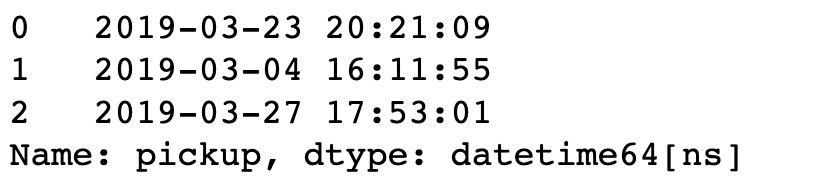

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [121]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')
df_taxi_clean['pickup_day']

0      2019-03-23
1      2019-03-04
2      2019-03-27
3      2019-03-10
4      2019-03-30
          ...    
6428   2019-03-31
6429   2019-03-31
6430   2019-03-23
6431   2019-03-04
6432   2019-03-13
Name: pickup_day, Length: 6433, dtype: datetime64[ns]

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. УВАГА! Якщо хочете отримати підписи по осі ОХ як на прикладі, то графік необхідно будувати через `df.plot(...)`. Якщо у Вас будуть інші підписи осі ОХ - це ОК.

Після виведення графіку скажіть, чи бачите щось дивне на ньому? Важливо написати відповідь в цьому завданні словами.

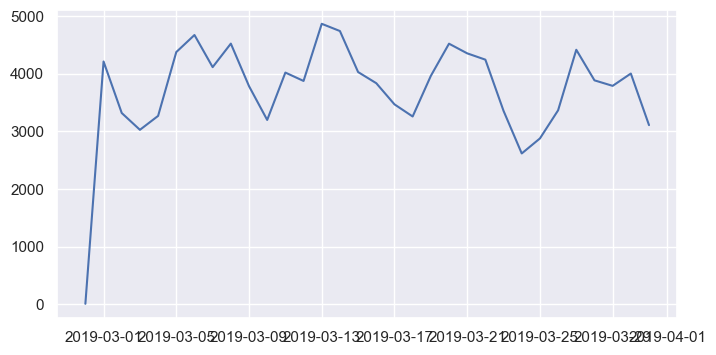

In [122]:
plt.plot(df_taxi_clean.groupby(['pickup_day']).total.sum());


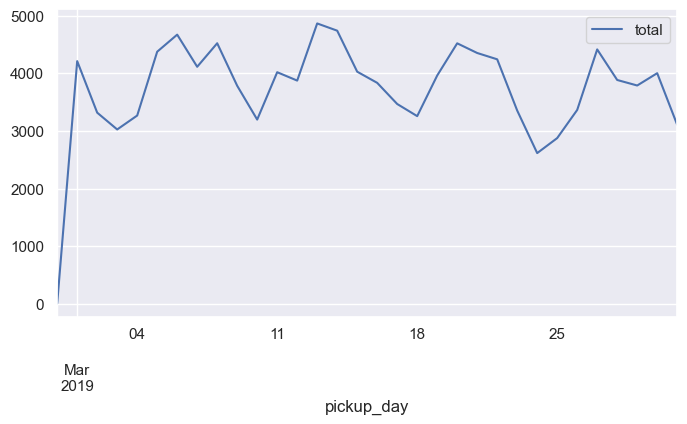

In [123]:
#Варіант №2
pivoted = df_taxi_clean.pivot_table(index = 'pickup_day', values='total', aggfunc= 'sum' )
pivoted.plot();

Дивним є початкова  точка. Здається, що вона не є об'єктивними даними

Приклад очікуваного графіку:

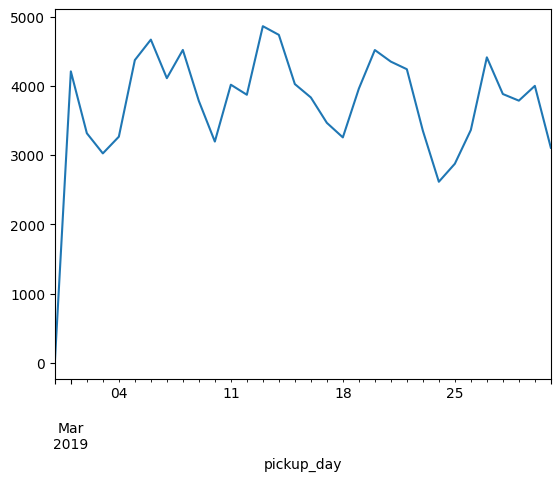

6.Виведіть кількість рядків для кожного pickup_day.

In [124]:
df_taxi_clean.groupby(['pickup_day']).total.count()

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
Name: total, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [125]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] !='2019-02-28']
df_taxi_clean.shape
df_taxi_clean.groupby(['pickup_day']).total.count()

pickup_day
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
Name: total, dtype: int64

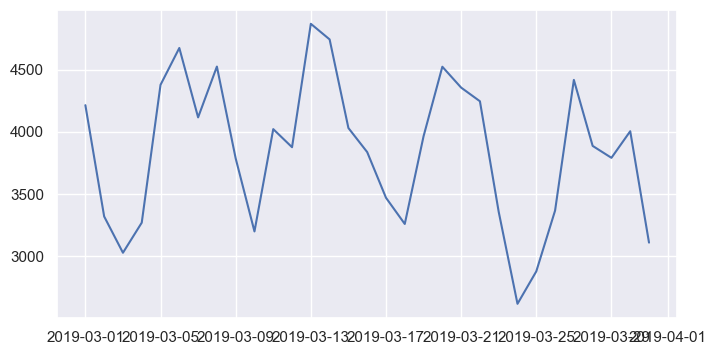

In [126]:
plt.plot(df_taxi_clean.groupby(['pickup_day']).total.sum());

Очікуваний графік:

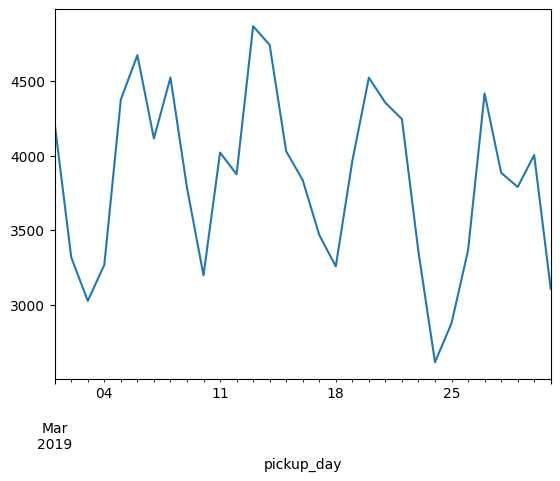

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [127]:
borough_pivot = df_taxi_clean.pivot_table(index = ['pickup_day'],
                                          columns =['pickup_borough'],
                                          values='total', aggfunc= 'sum' )

borough_pivot = borough_pivot.drop(columns = 'NA')

Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

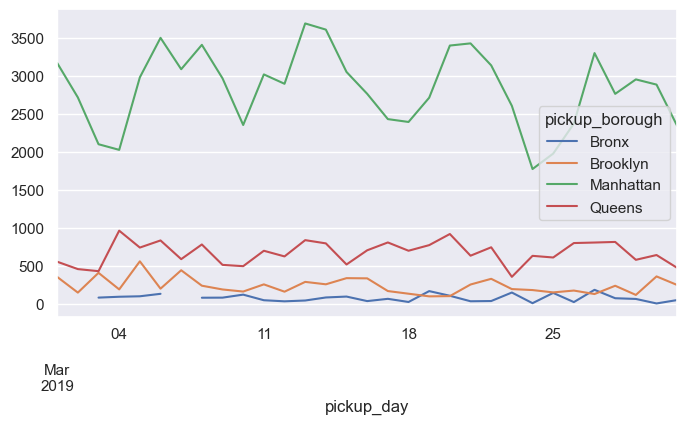

In [128]:
borough_pivot.plot();

За результатами виконання данного завдання, виходить, що найбільша сумма денних платежів у районі Manhattan

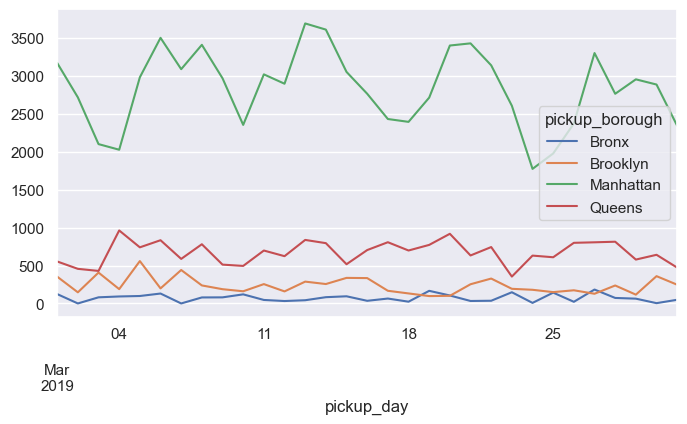

In [129]:
borough_pivot.fillna(0).plot();

Очікуваний графік :

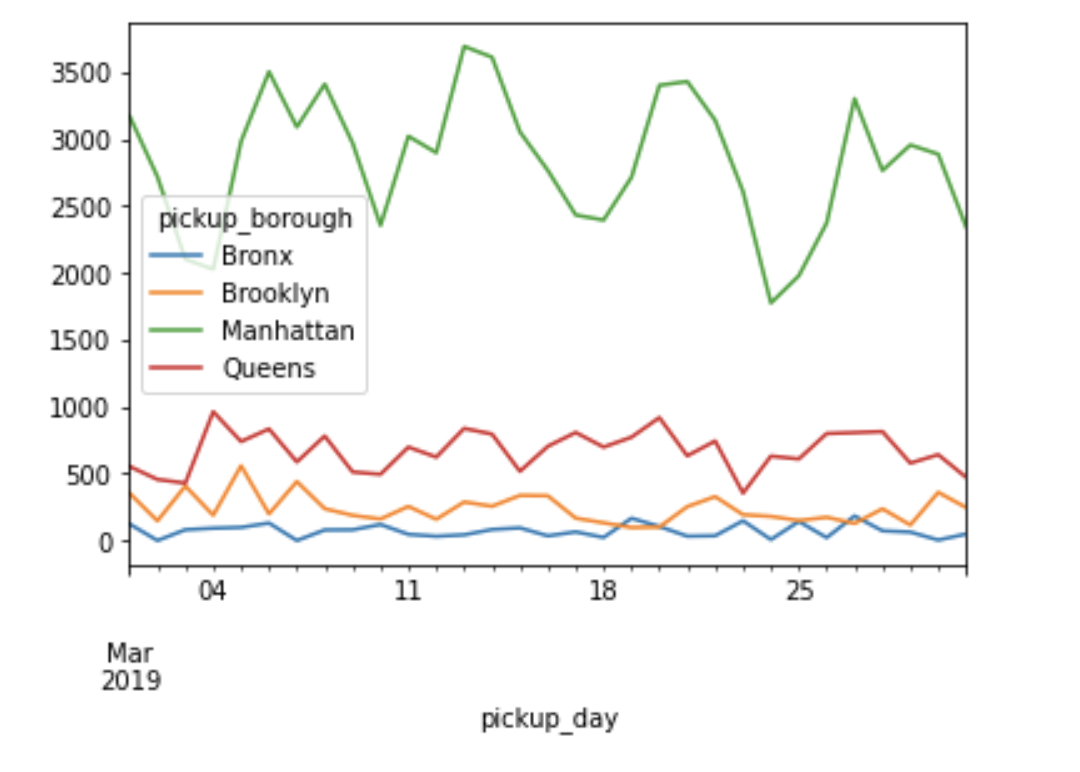

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   

`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot` та побудову графіку через `<назва датафрейму>.<назва графіку>()` - тобто методом датафрейму з пандаса. Але графік можна побудувати також використовуючи цикл. Для тих, хто хоче потренуватись, рекомендую зробити обома способами.

Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

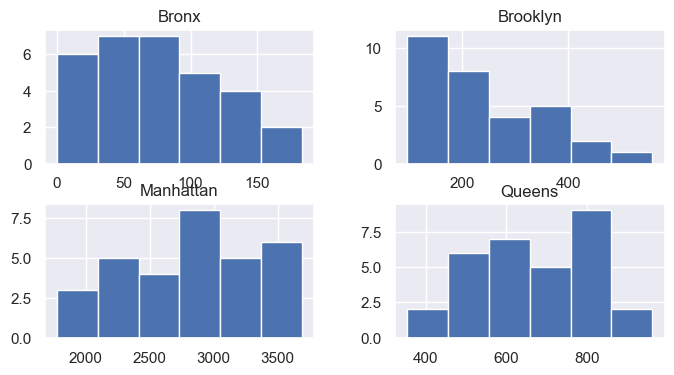

In [130]:
borough_pivot = borough_pivot.fillna(0)
borough_pivot.hist(bins = 6);

Я спробувала побудувати гістограми для різних значень bins, починаючи зі значення bins = 5. З одного боку, я думаю, що нам потрібна деталізація по денному доходу, але якщо занадто збільшити кількість проміжків, то ми отримуємо проміжки між стовпчиками та однакові значення для різних проміжків, тобто форма гістограми прагне стати окремими стовпчиками, між якими важко встановити якусь залежність

Приклад одного з правильних виконань завдання:

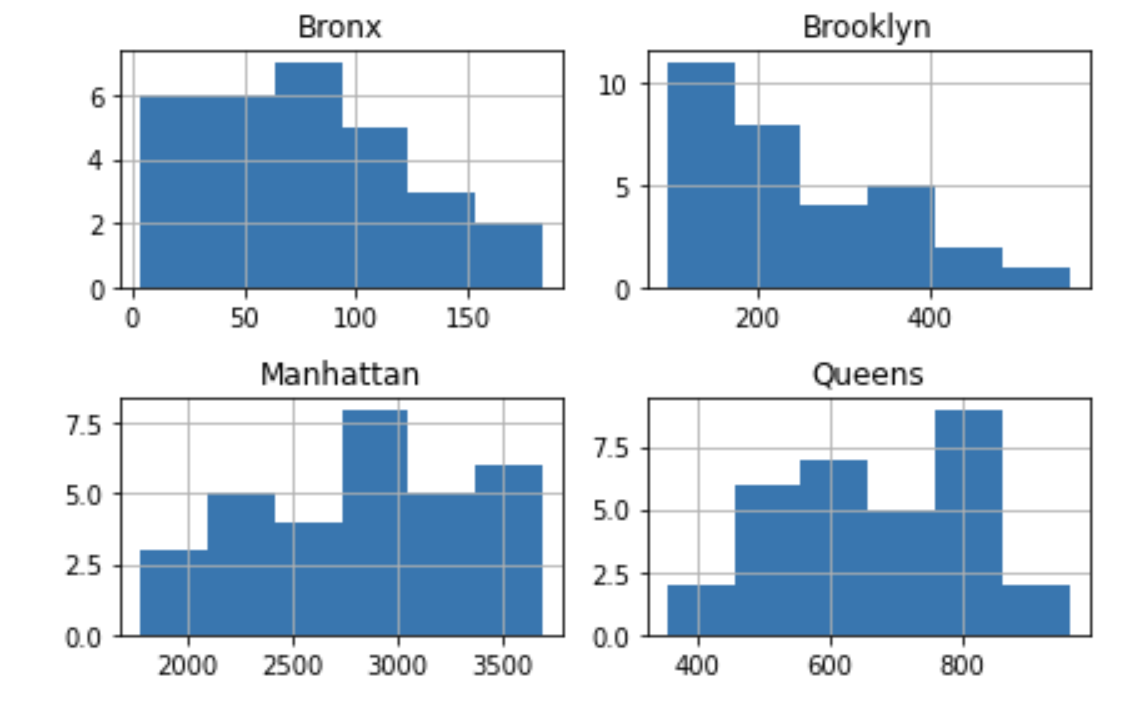

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

In [131]:
display(borough_pivot)

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,0.00,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,0.00,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


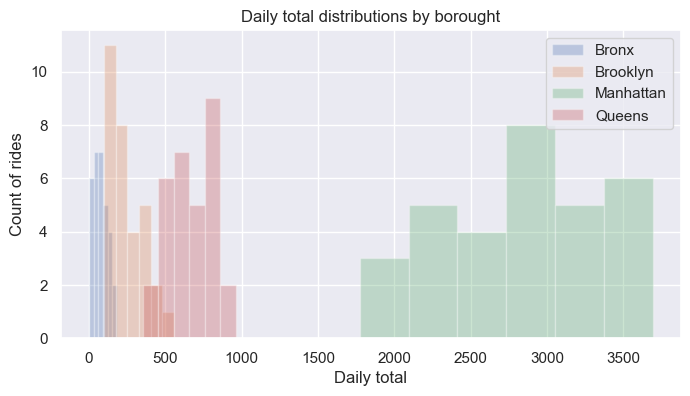

In [132]:
bins = 6
plt.figure(figsize=(8,4))
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.title('Daily total distributions by borought')
plt.grid(True)
for el in borough_pivot.columns:
    plt.hist(borough_pivot[el], bins, alpha = 0.3, label =el);

plt.legend(loc='upper right');

Очікуваний результат:

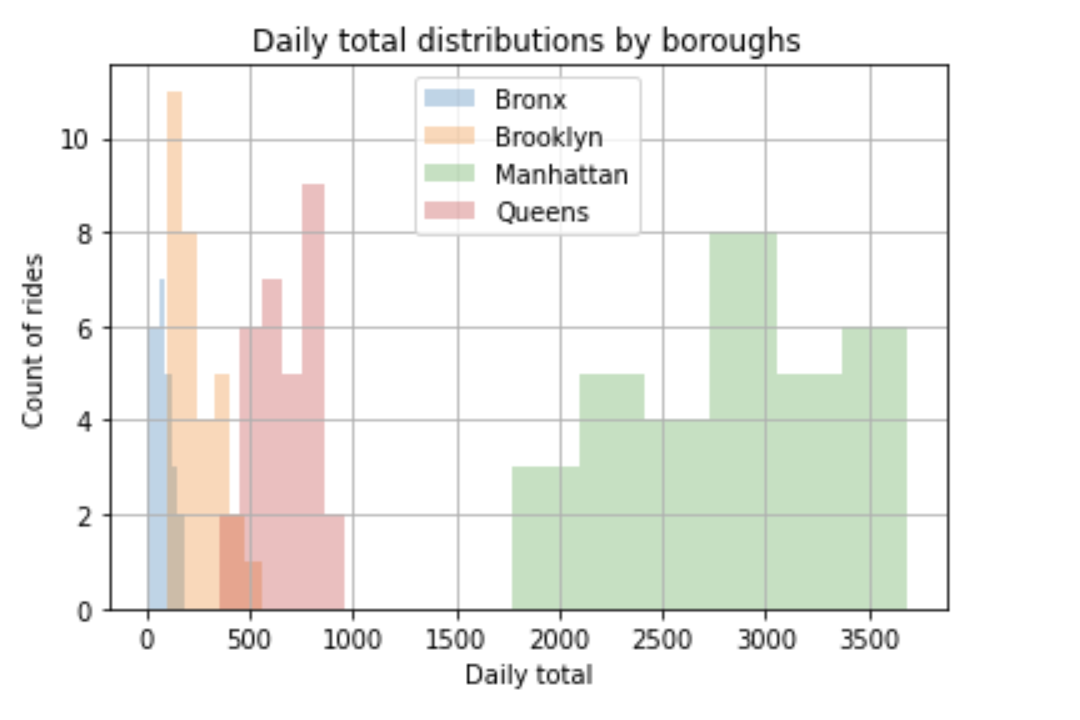

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

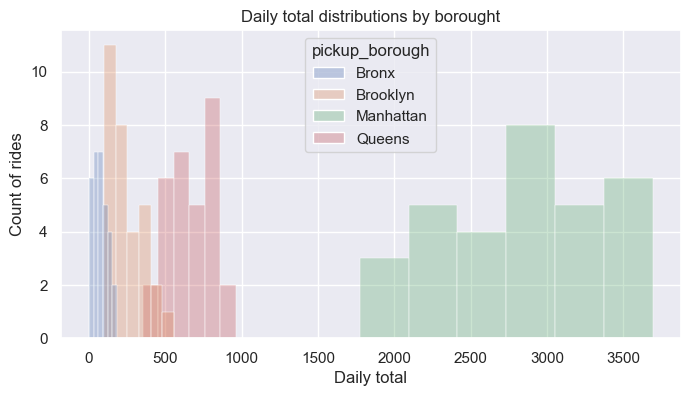

In [133]:
plt.grid(True)
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.title('Daily total distributions by borought')
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(data=borough_pivot, alpha = 0.3,  common_bins= False, hue_order = list(borough_pivot.columns));

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

In [134]:
df_taxi_clean['pickup'].min(), df_taxi_clean['pickup'].max(), 
df_taxi_clean.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30


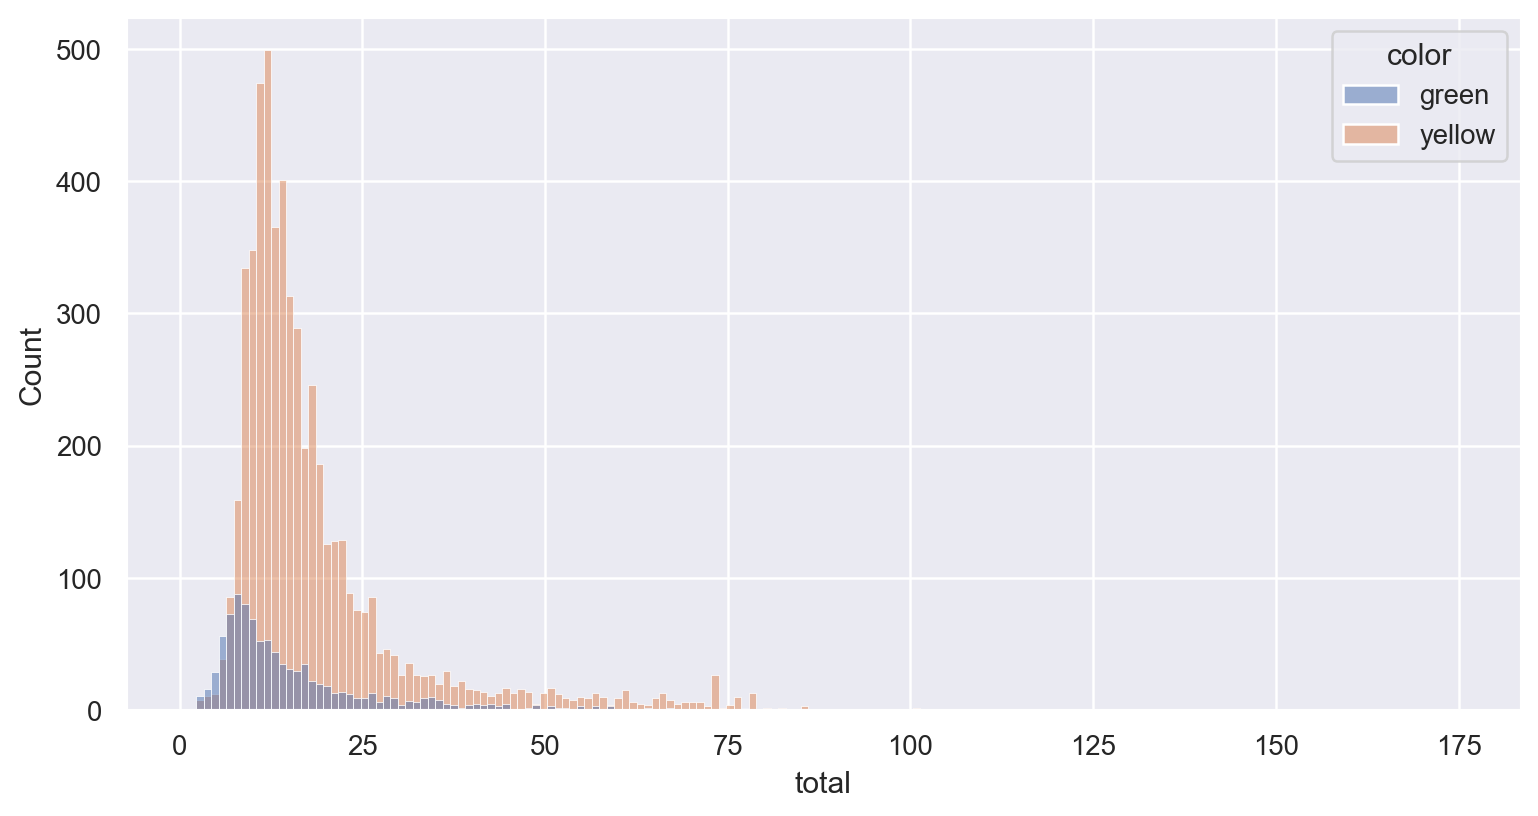

In [135]:

plt.figure(figsize=(10,5),dpi = 180)
sns.histplot(data=df_taxi_clean.sort_values(by=['color']), x = 'total', hue="color");

Очікуваний результат:

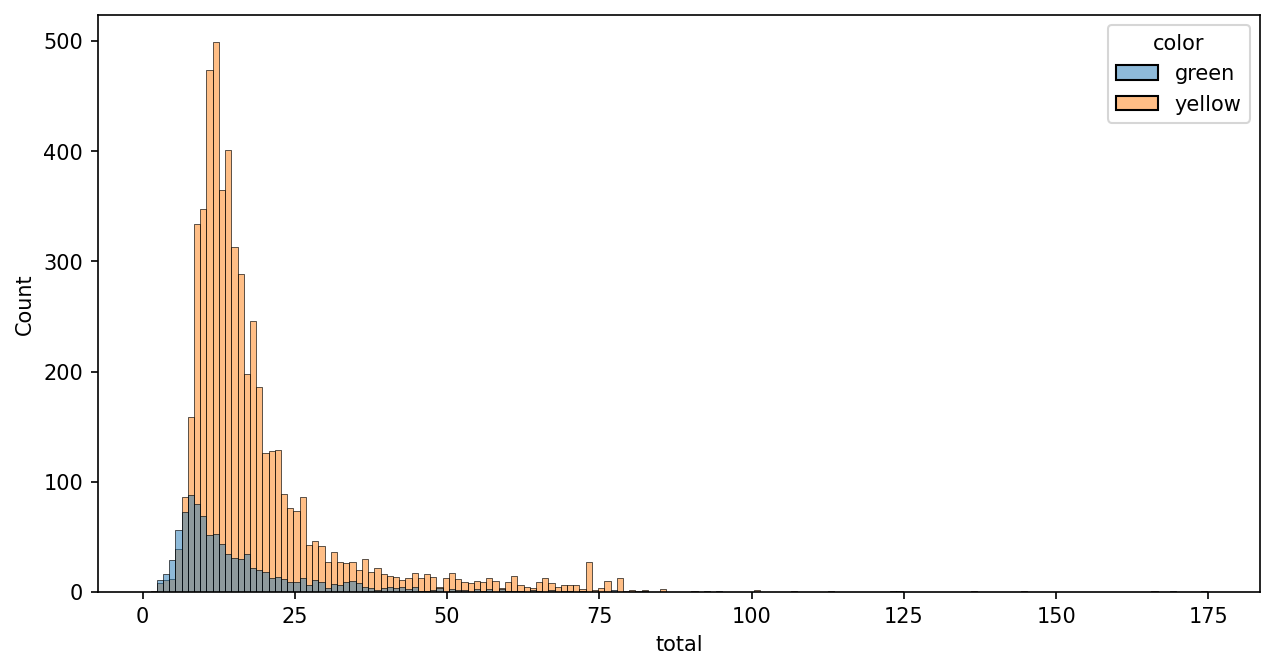

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

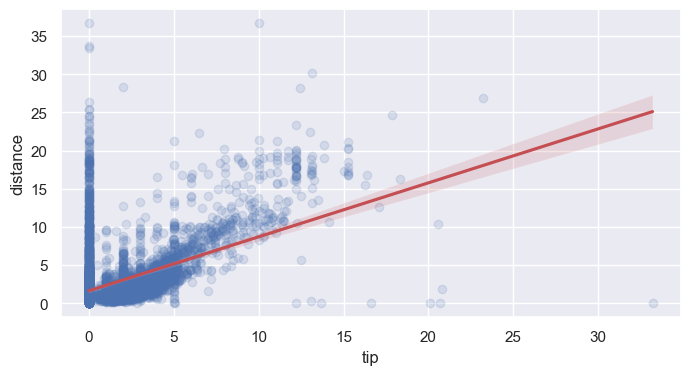

In [136]:
#plt.scatter(x=df_taxi_clean['tip'],y=df_taxi_clean['distance'], alpha = .1)
sns.regplot(x=df_taxi_clean['tip'], y=df_taxi_clean['distance'], scatter_kws={'alpha':0.15}, line_kws={'color':'r'});

Один з можливих результатів (побудовано з seaborn):

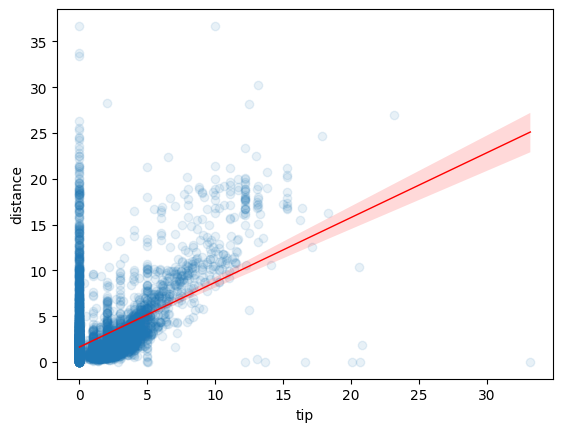

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

Що чайові не є гарантованими для будь-якої дистації, тобто завжди є вирогідність, що клієнт не залишить чайових

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найнижчий середній розмір** чайових?
- а в поїздках з якого району **найвищий середній розмір** чайових? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

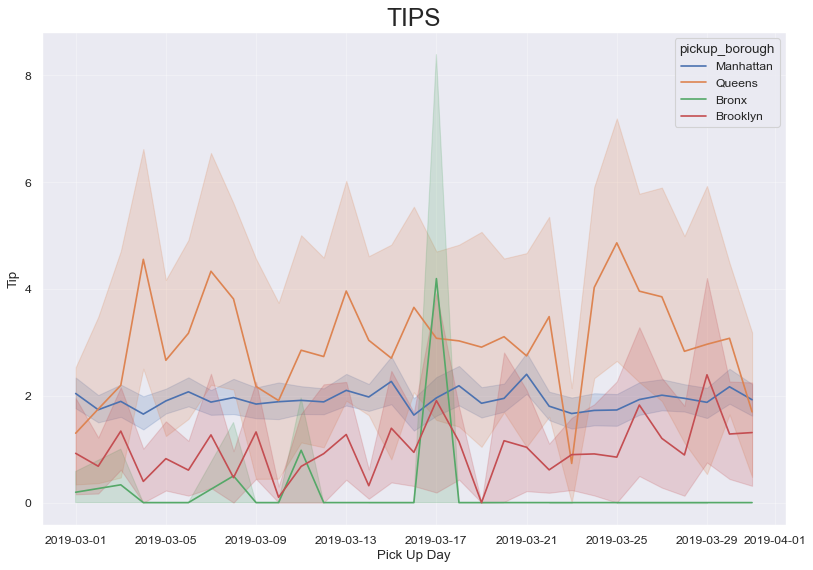

In [137]:
plt.figure(figsize=(12,8), dpi=80)

sns.lineplot(data=df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'], 
             x='pickup_day', 
             y='tip', 
             hue='pickup_borough')

plt.title("TIPS", fontsize=22)
plt.xlabel('Pick Up Day')
plt.ylabel('Tip')

plt.grid(axis='both', alpha=.3) # для зручності перегляду
plt.show()

In [138]:
df_taxi_clean.groupby(['pickup_borough']).tip.describe()

,count,mean,std,min,25%,50%,75%,max
pickup_borough,,,,,,,,
Bronx,99.0,0.148586,0.897261,0.0,0.0,0.000,0.0000,8.39
Brooklyn,383.0,0.966345,1.667210,0.0,0.0,0.000,1.6550,7.70
Manhattan,5268.0,1.939550,2.023955,0.0,0.0,1.860,2.8000,20.56
NA,26.0,5.101154,8.231736,0.0,0.0,1.725,5.0450,33.20
Queens,656.0,3.044695,4.354034,0.0,0.0,0.000,5.9625,23.19


Дайте відповіді на питання:
1. Прири початку поїздки в якому районі найнижчий середній розмір чайови
   Найменший розмір чайових водій отримує у районі Bronx (зелений колір лінії)х3. А
а в поїздках з якого району найвищий середній розмір чайов
   Я вважаю, що це район Queens (помаранчева лінія графіку). 
5. П?
при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у де
   Настабільніший середній розмір чайових у районі Manhattan (синя лінія графіку).Данні для району Bronx вважаю не репрезентативними для прийняття такого рішеннянь)?

Один з можливих результатів (побудовано з seaborn):

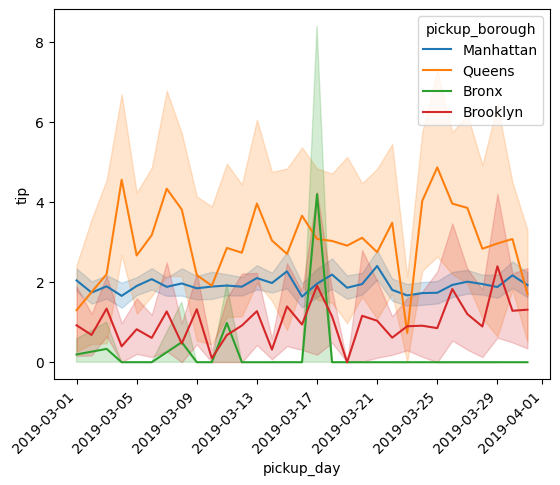

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

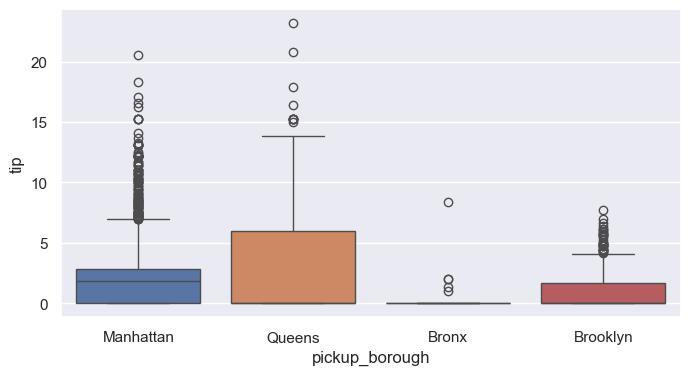

In [139]:
sns.boxplot(data=df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'], 
             x='pickup_borough', 
             y='tip',
             hue='pickup_borough');

Один з можливих результатів (побудовано з seaborn):

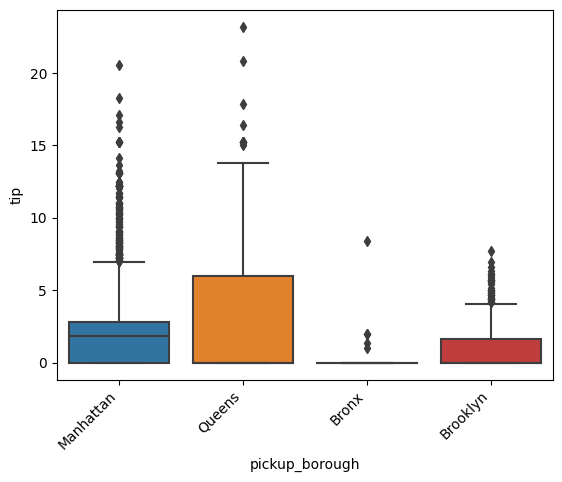

15.Творче завдання. Створіть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

Задача 1. Будемо досліджувати розмір чайових, в залежності від типу оплати. 
1.1 По-перше, з'ясуємо, який середній розмір чайових. Виконаємо розрахунки і побудуємо графіки залежності чайових від дня для кожного типу. З'ясували, що чайові сплачують лише пасажири, що розраховуються credit card. Можливо, чайові нараховуються та автоматично додаються до чека.
1.2 Далі будем розглядати лише дані с оплатою credit card і подивимося, чи залежить сума чайових від типу авто (yellow/green). Аналіз графіка показує, що найбільші чайові отримують водії yellow таксі. Це означає, що водій зацікавлений працювати саме в такому типові авто. Власники бізнесу можуть запровадити щось на кшталт рейтингу для водіїв і переводити працювати з green таксі до yellow таксі лише водіїв з високим рейтингом та добрими відгуками.

In [140]:
df_taxi_clean.groupby(['payment']).tip.describe()

,count,mean,std,min,25%,50%,75%,max
payment,,,,,,,,
NA,44.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
cash,1811.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
credit card,4577.0,2.781805,2.488783,0.0,1.5,2.2,3.26,33.2


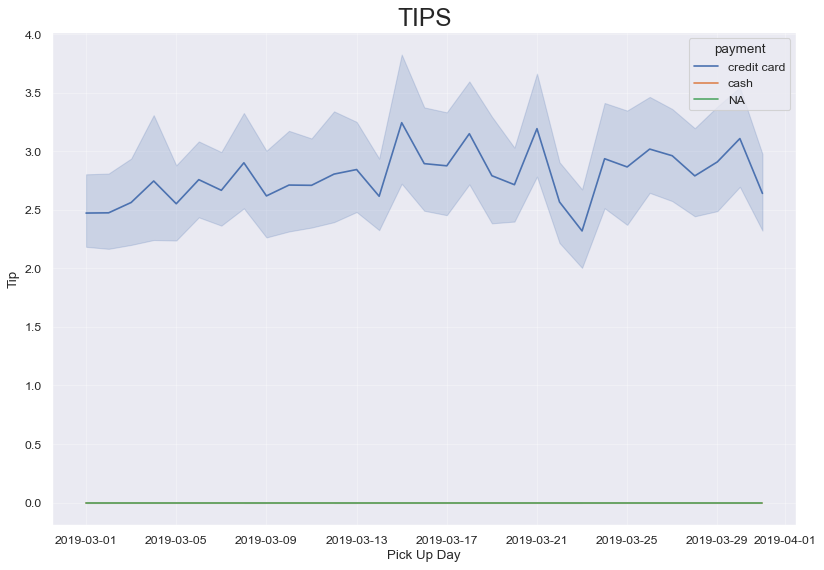

In [141]:
plt.figure(figsize=(12,8), dpi=80)

sns.lineplot(data=df_taxi_clean, 
             x='pickup_day', 
             y='tip', 
             hue='payment')

plt.title("TIPS", fontsize=22)
plt.xlabel('Pick Up Day')
plt.ylabel('Tip')

plt.grid(axis='both', alpha=.3) # для зручності перегляду
plt.show()

In [142]:
df_taxi_clean[df_taxi_clean['payment']=='credit card'].groupby(['color']).tip.describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
green,577.0,1.353795,1.755263,0.0,0.0,1.00,2.05,10.71
yellow,4000.0,2.987795,2.511437,0.0,1.7,2.35,3.45,33.20


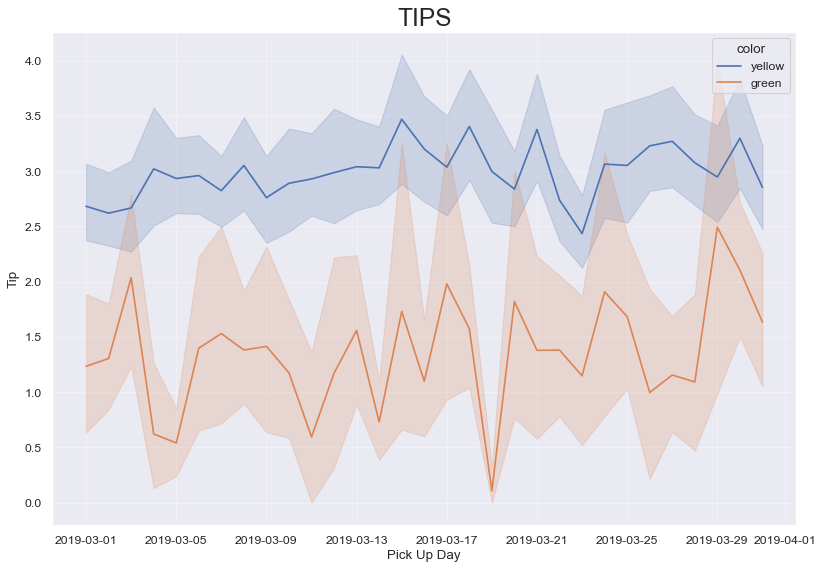

In [143]:
plt.figure(figsize=(12,8), dpi=80)

sns.lineplot(data=df_taxi_clean[df_taxi_clean['payment']=='credit card'], 
             x='pickup_day', 
             y='tip', 
             hue='color')

plt.title("TIPS", fontsize=22)
plt.xlabel('Pick Up Day')
plt.ylabel('Tip')

plt.grid(axis='both', alpha=.3) # для зручності перегляду
plt.show()

ВИСНОВКИ:
По-перше, з'ясуємо, який середній розмір чайових. Виконаємо розрахунки та побудуємо графіки залежності чайових від дня для кожного типу. З'ясували, що чайові сплачують лише пасажири, що розраховуються credit card. Можливо, чайові нараховуються та автоматично додаються до чека.
По-друге, будемо розглядати лише дані із оплатою credit card і подивимося, чи залежить сума чайових від типу авто (yellow/green). Аналіз графіка показує, що найбільші чайові отримують водії yellow таксі. Це означає, що водій зацікавлений працювати саме в такому типові авто. Власники бізнесу можуть запровадити щось на кшталт рейтингу для водіїв і переводити працювати з green таксі до yellow таксі лише водіїв з високим рейтингом та добрими відгуками.

Задача 2. Проаналізувати, як змінюється денний виторг в залежності від дня тижня і району, куди було викликано таксі.

In [144]:
df_taxi_clean['weekday'] =df_taxi_clean['pickup_day'].dt.dayofweek


In [145]:
borough_pivot = df_taxi_clean.pivot_table (index='weekday',
                                          columns='pickup_borough',
                                          values='total',
                                          aggfunc='sum')
borough_pivot = borough_pivot.drop(columns ='NA')

In [146]:
#display(borough_pivot)
df_weekday = pd.DataFrame(
    index = ['Monday','Tuesday','Wednesday','Thusday','Friday','Saturday','Sunday'],
    data =borough_pivot.values, 
    columns =list(borough_pivot.columns))
display(df_weekday)

,Bronx,Brooklyn,Manhattan,Queens
Monday,303.61,724.99,9416.01,2966.40
Tuesday,318.07,987.70,10962.30,2933.46
Wednesday,461.26,714.40,13891.55,3394.58
Thusday,187.62,1186.42,12888.98,2827.99
Friday,395.65,1371.47,15722.56,3172.06
Saturday,266.45,1221.30,13938.93,2666.85
Sunday,321.10,1161.20,10999.90,2833.05


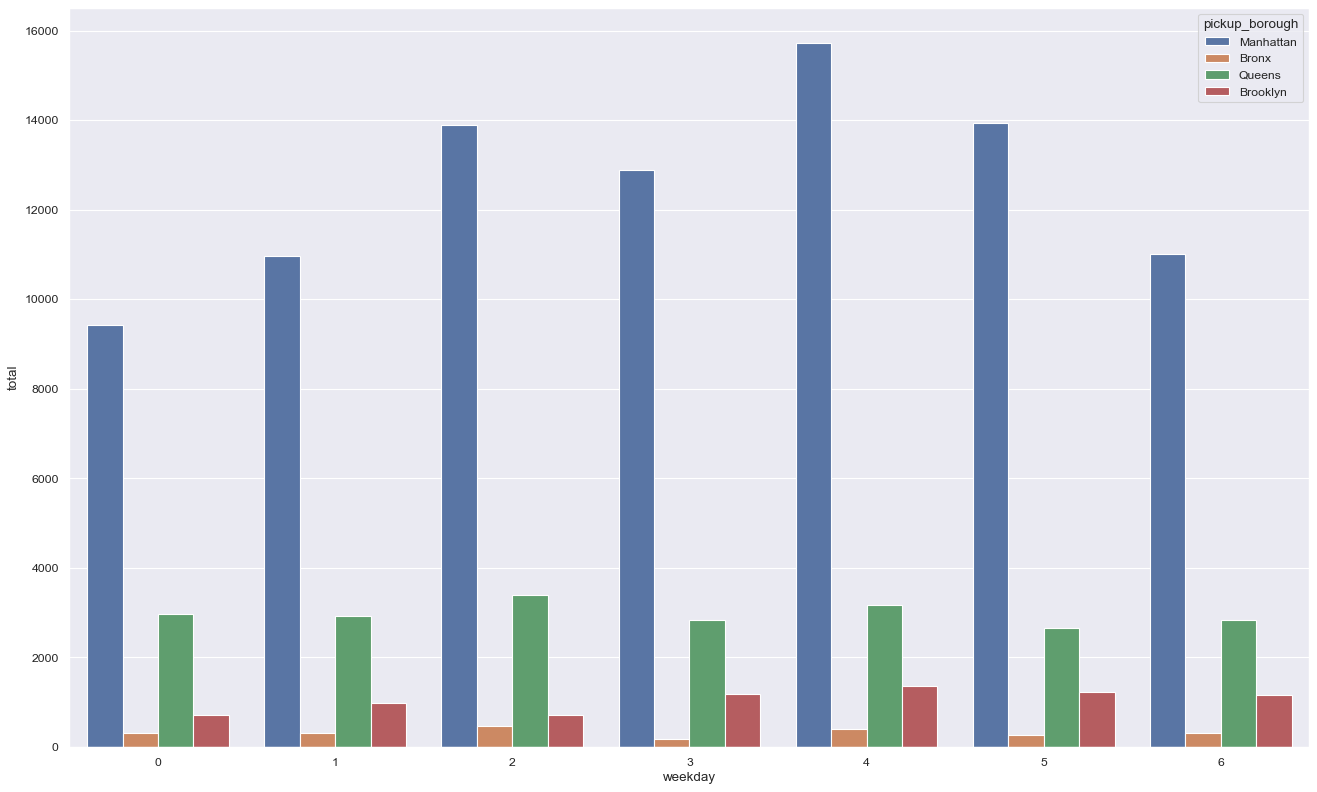

In [147]:
plt.figure(figsize=(20,12), dpi=80)
sns.barplot(data=df_taxi_clean[df_taxi_clean['pickup_borough'] !='NA'], x="weekday", y="total", estimator="sum", hue="pickup_borough",errorbar=None);

ВИСНОВКИ:
Побудували Pivot-таблицю і зробили візуалізацію даних. Взагалі, бачимо, що коливання денногу виторгу є лише у районі Manhattan - найвища кількість поїздок у п'ятницю (офісні працівники поспішають у бари чи додому до родини), а ось у неділю кількість поїздок різко падає. Я б порекомендувала таксомоторним компаніям збільшити кількість машин у п'ятницю, щоб підвищити рівень сервісу (не забуваємо, що попередній аналіз показав нам, що у цьому районі найвищий заробіток для компанії та найвищі чайові. Тут мешкають наші best clients), а у неділю-понеділок треба проводити заходи щодо спонукання клієнтів користуватися таксі. В інших районах попит на машини не залежить від дня тижня і зберігається на одному рівні.

In [148]:
#df_taxi_clean.groupby(['pickup_day','pickup_borough'])['total'].agg(['size','mean','min','max'])

ЗАДАЧА 3. Тепер спробуємо проаналізувати, як впливають дні тижня, тривалість поїздки, кількість пасажирів на загальний чек і чайові. У випадку, якщо буде з'ясована сильна залежність між парами якихось величин, то можна буде сформувати поради щодо того, як збільшувати кількість отриманих чайових.
Для цього обчислимо кореляцію цих величин і побудуємо теплову матрицю.


In [149]:
corr_data = df_taxi_clean[['weekday','total','tip','distance','passengers']].copy()
corr_data.corr()

,weekday,total,tip,distance,passengers
weekday,1.000000,-0.035813,-0.025519,-0.018500,0.018849
total,-0.035813,1.000000,0.646147,0.904677,0.015647
tip,-0.025519,0.646147,1.000000,0.452553,0.021044
distance,-0.018500,0.904677,0.452553,1.000000,0.009373
passengers,0.018849,0.015647,0.021044,0.009373,1.000000


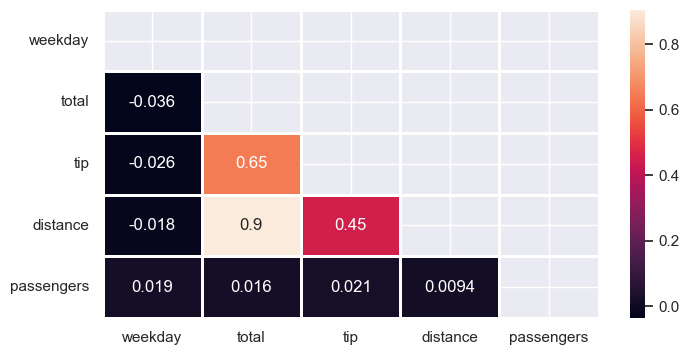

In [150]:
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

ВИСНОВКИ: На жаль, сильної кореляції між вказаними вище параметрами не підтверджено. Бачимо що є залежність між відстанню і загальним чеком, що є логічним і досить правильним, а також, що розмір чайових збільшується зі збільшенням відстані поїздки (можна подумати, як збільшити комфорт пасажирів при поїздках на великі відстані, щоб ще більше підвищити лояльність клієнтів, а також щоб зі сторони компанії перевізника продемонструвати свою лояльність до клієнтів.)